In [3]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [239]:
data_path = 'D:/Research/ig2/igibson/data/demos'
vi1 = ["normal", "amd", "glaucoma", "cataract"]
vi2 = ["myopia", "presbyopia"]
task = "wipe"

### Completion time and success rate

In [221]:
npy_data = {}
for i in vi1 + vi2:
    npy_data[f"{i}_success"] = np.load(f"{data_path}/{task}_{i}_success_list.npy")
    npy_data[f"{i}_time"] = np.load(f"{data_path}/{task}_{i}_completion_time.npy")


In [222]:
npy_data

{'normal_success': array([ True,  True,  True,  True, False]),
 'normal_time': array([27.06455421, 33.15583539, 39.53674626, 46.53556132, 52.70396471]),
 'amd_success': array([ True,  True,  True, False, False,  True,  True,  True,  True]),
 'amd_time': array([38.63939357, 42.05009556, 45.22856236, 48.56090736, 52.49101686,
        59.12021923, 66.67117381, 70.73678875, 73.89913082]),
 'glaucoma_success': array([ True, False, False, False, False,  True,  True,  True, False,
        False,  True]),
 'glaucoma_time': array([14.99183249, 20.55632973, 23.43498254, 26.29142332, 29.72659135,
        36.30161977, 42.10271835, 55.22356629, 59.10912585, 68.64843392,
        72.40072203]),
 'cataract_success': array([False,  True,  True,  True,  True,  True,  True,  True,  True]),
 'cataract_time': array([19.37102175, 23.02121758, 26.83764815, 30.82221818, 34.13423729,
        37.54611635, 43.9498713 , 50.66566062, 54.10773706]),
 'myopia_success': array([ True,  True, False,  True, False, False

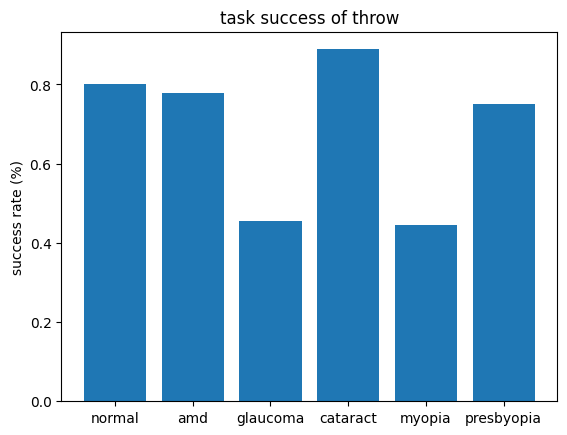

In [238]:
# plt.boxplot([npy_data["normal_time"], npy_data["amd_time"], npy_data["glaucoma_time"], npy_data["cataract_time"], npy_data["myopia_time"], npy_data["presbyopia_time"]], labels=["normal", "amd", "glaucoma", "cataract", "myopia", "presbyoia"])
# for vi in vi1 + vi2:
#     plt.bar(np.sum(npy_data[f"{vi}_success"]) / len(npy_data[f"{vi}_success"]), label=vi)
plt.bar(range(6), [np.sum(npy_data[f"{vi}_success"]) / len(npy_data[f"{vi}_success"]) for vi in vi1 + vi2], tick_label=vi1+vi2)
# plt.legend()
plt.title(f"task success of {task}")
plt.ylabel("success rate (%)")
plt.show()

### HDF5 Device data

In [254]:
hfs = {}
for i in vi1 + vi2:
    for j in range(8):
        hfs[f"{i}_{j}"] = h5py.File(f"{data_path}/{task}_{i}_{j}.hdf5")

In [255]:
data = {}
for hf in hfs:
    data[hf] = np.array(hfs[hf]["vr"]["vr_device_data"]["right_controller"])

In [256]:
data["normal_0"]

array([[ 1.        ,  0.92348456, -0.49429458, ...,  0.80527882,
        -0.10073265, -0.15447735],
       [ 1.        ,  0.92196345, -0.49605173, ..., 13.71480764,
         1.08119312,  3.0013267 ],
       [ 1.        ,  0.92082977, -0.49804133, ..., 15.11246746,
         0.67594469,  5.88491101],
       ...,
       [ 1.        ,  0.4736194 , -1.0202415 , ...,  0.35561238,
        -1.51273758,  0.22082012],
       [ 1.        ,  0.476515  , -1.02125573, ...,  0.25871825,
        -1.59328846,  0.25784541],
       [ 1.        ,  0.48031634, -1.02240586, ...,  0.23788139,
        -1.63284627,  0.37184016]])

In [257]:
dist = {}
for i in vi1 + vi2:
    dist[i] = []
    for j in range(8):
        cond = f"{i}_{j}"
        dist[i].append(np.sum(np.linalg.norm(data[cond][:, 1:4][1:] - data[cond][:, 1:4][:-1], axis=1)))

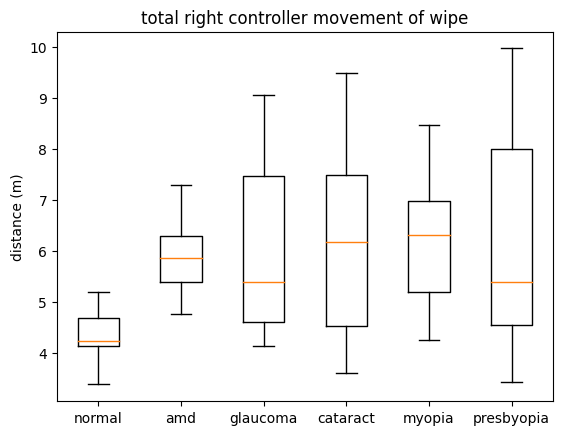

In [259]:
plt.boxplot([dist["normal"], dist["amd"], dist["glaucoma"], dist["cataract"], dist["myopia"], dist["presbyopia"]], labels=["normal", "amd", "glaucoma", "cataract", "myopia", "presbyopia"])
plt.title(f"total right controller movement of {task}")
plt.ylabel("distance (m)")
plt.show()

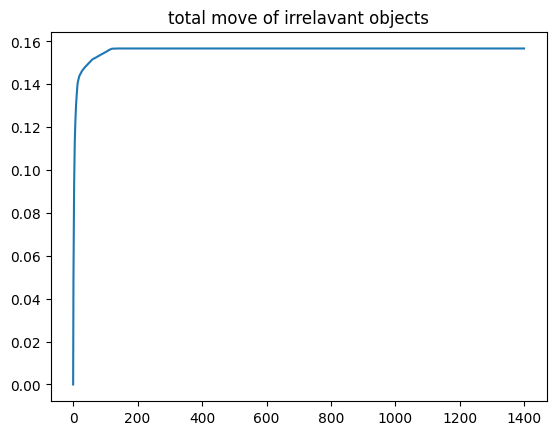

In [4]:
data = [x[0] for x in hf["total_movement_of_irrelavant_objs"]]
plt.plot(data)
plt.title("total move of irrelavant objects")
plt.show()

Text(0.5, 1.0, 'right controller trigger')

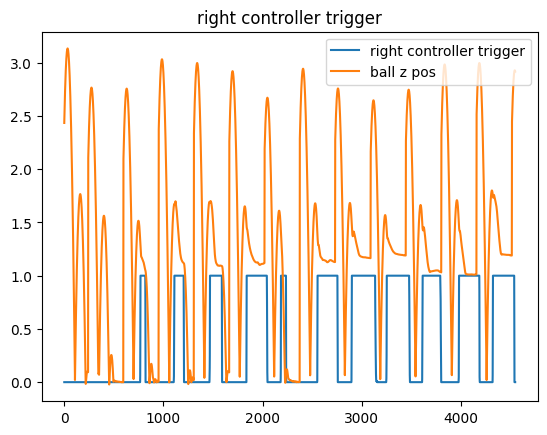

In [107]:
plt.plot(hf["vr"]["vr_button_data"]["right_controller"][:, 0], label="right controller trigger")
plt.plot(hf["physics_data"]["1"]["position"][:, 2], label="ball z pos")
plt.legend()
plt.title("right controller trigger")

Text(0.5, 1.0, 'processed data')

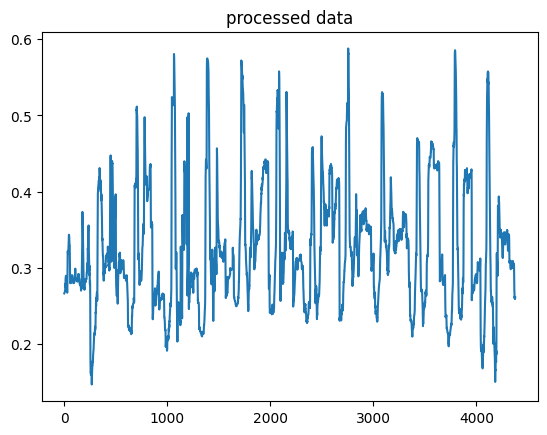

In [29]:
# arr = np.array(hf["vr"]["vr_eye_tracking_data"][:])
# arr = arr[:, 1:4] + arr[:, 4:7] * 1.5
# arr = arr[:, 2]
# arr = arr[arr > 0]
# plt.plot(arr)
# plt.title("processed data")

arr = np.array(hf["vr"]["vr_eye_tracking_data"][:, -1])
arr = arr[arr > 0]
arr = (arr - 0.5) * 2.5
plt.plot(arr)
plt.title("processed data")

In [69]:
for h in hfs.values():
       if h.__bool__():
              h.close()